## Holdout Method (Sampling)
- 데이터를 training과 test로 나눠서 모델을 생성하고 테스트하는 기법
- 가장 일반적인 모델 생성을 위한 데이터 랜덤 샘플링 방법
- training고 test를 나누는 비율은 데이터의 크기에 따라 다름

## Validation Set
- test set은 model 생성시 절대 training set에 포함되지 않아야 함
- test set과 달리 model 생성시 model에 성능을 평가하기 위해 사용
- Hyper Parameter Turning 시 성능 평가를 통해 overfitting방지
- training중간에 model의 성능을 점검

## K-fold cross validation
- 학습 데이터를 k번 나눠서 test와 train을 실시 -> test의 평균값을 사용
- 모델의 parameter 튜닝, 간단한 모델의 최종 성능 측정 등 사용

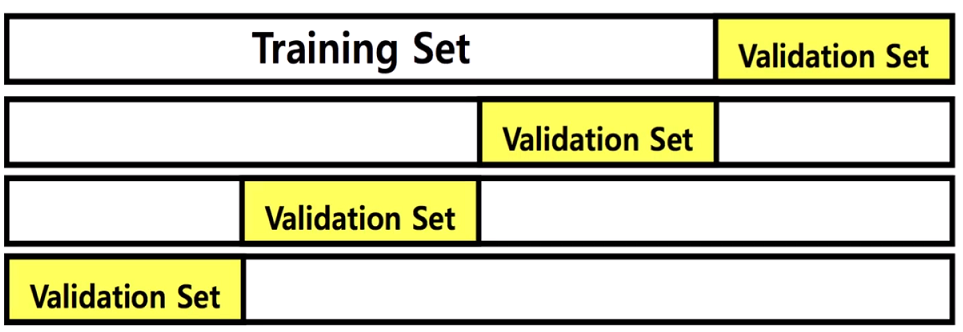

In [2]:
from sklearn import datasets
boston = datasets.load_boston()

In [3]:
X = boston.data
y = boston.target

In [4]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True)

for train_index, test_index in kf.split(X):
    print("Train - ", len(train_index))
    print("Test - ", len(test_index))

Train -  455
Test -  51
Train -  455
Test -  51
Train -  455
Test -  51
Train -  455
Test -  51
Train -  455
Test -  51
Train -  455
Test -  51
Train -  456
Test -  50
Train -  456
Test -  50
Train -  456
Test -  50
Train -  456
Test -  50


In [6]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.metrics import mean_squared_error
kf = KFold(n_splits=10)
lasso_regressor = Lasso()
ridge_regressor = Ridge()

lasso_mse = []
ridge_mse = []

for train_index, test_index in kf.split(X):
    lasso_regressor.fit(X[train_index], y[train_index])
    ridge_regressor.fit(X[train_index], y[train_index])
    
    lasso_mse.append(mean_squared_error(y[test_index], lasso_regressor.predict(X[test_index])))
    ridge_mse.append(mean_squared_error(y[test_index], ridge_regressor.predict(X[test_index])))
    
sum(lasso_mse)/10, sum(ridge_mse)/10

(34.46408458830231, 34.07824620925929)

In [11]:
from sklearn.model_selection import cross_val_score
import numpy as np

lasso_regressor = Lasso(warm_start=False)
ridge_regressor = Ridge()

lasso_scores = cross_val_score(lasso_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
ridge_scores = cross_val_score(ridge_regressor, X, y, cv=10, scoring='neg_mean_squared_error')
np.mean(lasso_scores), np.mean(ridge_scores)

(-34.46408458830231, -34.07824620925929)

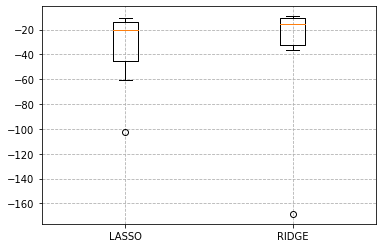

In [12]:
import matplotlib.pyplot as plt
labels=["LASSO", "RIDGE"]
plt.boxplot((lasso_scores, ridge_scores), labels=labels)
plt.grid(linestyle='--')
plt.show()